# Bank Loan Analysis(Project)
## For this project we have 2 datasets Finance_1 and Finance_2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Finance_1.csv')
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti
0,54734,80364,25000,25000,19080,36 months,11.89%,829.10,B,B4,< 1 year,RENT,85000.0,Verified,2009-01-08,Fully Paid,debt_consolidation,941xx,CA,19.48
1,55742,114426,7000,7000,673,36 months,10.71%,228.22,B,B5,< 1 year,RENT,65000.0,Not Verified,2008-01-05,Fully Paid,credit_card,112xx,NY,14.29


In [3]:
data.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv          int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
zip_code                object
addr_state              object
dti                    float64
dtype: object

In [4]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti'],
      dtype='object')

In [5]:
data.shape

(39717, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  int64  
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_length           38642 non-null  object 
 11  home_ownership       39717 non-null  object 
 12  annual_inc           39717 non-null  float64
 13  verification_status  39717 non-null  object 
 14  issue_d              39717 non-null  object 
 15  loan_status          39717 non-null 

In [7]:
data[data.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti


In [8]:
data.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
dtype: int64

# Task 1: Year wise loan amount Stats


In [9]:
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti
0,54734,80364,25000,25000,19080,36 months,11.89%,829.10,B,B4,< 1 year,RENT,85000.0,Verified,2009-01-08,Fully Paid,debt_consolidation,941xx,CA,19.48
1,55742,114426,7000,7000,673,36 months,10.71%,228.22,B,B5,< 1 year,RENT,65000.0,Not Verified,2008-01-05,Fully Paid,credit_card,112xx,NY,14.29


In [10]:
data['issue_d'] = data['issue_d'].str.strip()

In [11]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format = "%Y-%m-%d")

In [12]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv                 int64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
dtype: object

In [13]:
data['year'] = data['issue_d'].dt.year

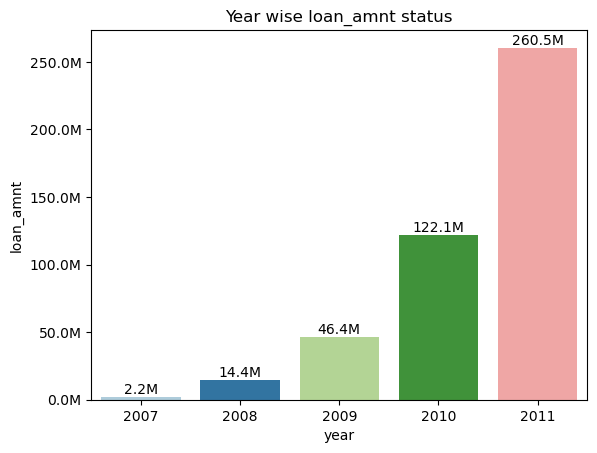

In [14]:
ax = data.groupby('year')['loan_amnt'].sum().reset_index().sort_values(by = ['loan_amnt'])

from matplotlib.ticker import FuncFormatter

def y_format(x,_):
    return f"{x/1000_000:.1f}M"

bx = sns.barplot(x = 'year', y = 'loan_amnt', data = ax, palette = "Paired" )

bx.yaxis.set_major_formatter(FuncFormatter(y_format))

for i in bx.containers:
    bx.bar_label(i, fmt = lambda x: f"{x/1000_000:.1f}M")

plt.title("Year wise loan_amnt status")
plt.show()

**1. Examining the total loan volume each year can indicate the overall demand 	for credit. Increasing loan volumes of 122m in 2010 to 261m in 2011 suggests 	economic growth or higher consumer confidence.**

# KPI-1(a): Average Interest Rate

In [15]:
data['int_rate'] = pd.to_numeric(data['int_rate'].str.rstrip('%'))

In [16]:
data['int_rate'].dtype

dtype('float64')

In [17]:
f"{round(data['int_rate'].mean(),2)}%"

'12.02%'

**The average interest on the loan is 12.02%**



# KPI-2: Grade wise revol_bal

In [18]:
data2 = pd.read_csv('Finance_2.csv')

In [19]:
data2.head(2)

,id,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,54734,0,Feb-94,0,NaN,NaN,10,0,28854,52.10%,...,21817.65,25000.0,4330.36,0.0,0.0,0.0,Oct-11,7392.08,NaN,Aug-12
1,55742,0,Oct-00,0,NaN,NaN,7,0,33623,76.70%,...,684.94,7000.0,1215.54,0.0,0.0,0.0,Jun-11,228.48,NaN,Aug-12


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   delinq_2yrs              39717 non-null  int64  
 2   earliest_cr_line         39717 non-null  object 
 3   inq_last_6mths           39717 non-null  int64  
 4   mths_since_last_delinq   14035 non-null  float64
 5   mths_since_last_record   2786 non-null   float64
 6   open_acc                 39717 non-null  int64  
 7   pub_rec                  39717 non-null  int64  
 8   revol_bal                39717 non-null  int64  
 9   revol_util               39667 non-null  object 
 10  total_acc                39717 non-null  int64  
 11  initial_list_status      39717 non-null  object 
 12  out_prncp                39717 non-null  float64
 13  out_prncp_inv            39717 non-null  float64
 14  total_pymnt           

In [21]:
df = pd.merge(data,data2, on = 'id')

In [22]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,54734,80364,25000,25000,19080,36 months,11.89,829.10,B,B4,...,21817.65,25000.0,4330.36,0.0,0.0,0.0,Oct-11,7392.08,NaN,Aug-12
1,55742,114426,7000,7000,673,36 months,10.71,228.22,B,B5,...,684.94,7000.0,1215.54,0.0,0.0,0.0,Jun-11,228.48,NaN,Aug-12


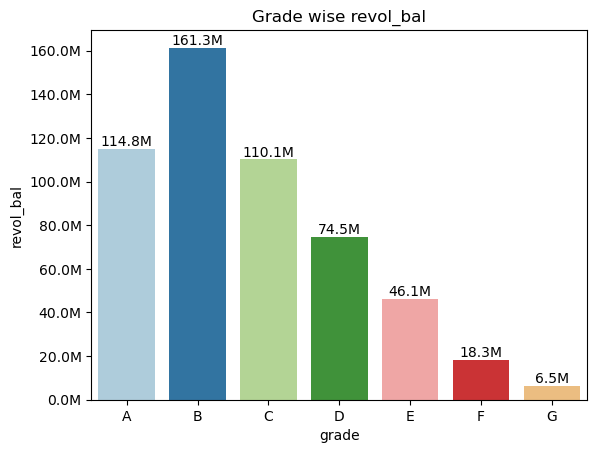

In [23]:
ax = df.groupby('grade',)['revol_bal'].sum().reset_index()


from matplotlib.ticker import FuncFormatter

def y_format(x,_):
    return f"{x/1000_000:.1f}M"

bx = sns.barplot(x = 'grade', y = 'revol_bal', data = ax, palette = "Paired")

bx.yaxis.set_major_formatter(FuncFormatter(y_format))

for i in bx.containers:
    bx.bar_label(i, fmt = lambda x: f"{x/1000_000:.1f}M")

plt.title("Grade wise revol_bal")
plt.show()

**Grade B has a maximum revolving balance while Grade G has a minimum revolving balance.**



# KPI-2(a): Grade and Sub_grade wise revol_bal

In [24]:
cx = df.groupby(['grade','sub_grade'])['revol_bal'].sum().reset_index()
cx

,grade,sub_grade,revol_bal
0,A,A1,11365196
1,A,A2,14004780
2,A,A3,19543922
3,A,A4,34557156
4,A,A5,35303045
5,B,B1,21842079
6,B,B2,26478439
7,B,B3,39723554
8,B,B4,35405811
9,B,B5,37858666


**1. Max revolving balance is 40m for Grade B and sub-grade B3**
**2. 
Min revolving balance is 0.7m for Grade G and sub-grade G**5


### Analysis:- Banks often assign higher interest rates to borrowers with lower grades and subgrades to compensate for the increased risk of default. Higher interest rates can make it more difficult for these borrowers to pay off their balances, leading to higher revolving balances over time


# KPI-3: Total Payment for Verified Status Vs Total Payment for Non Verified Status


In [25]:
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,year
0,54734,80364,25000,25000,19080,36 months,11.89,829.10,B,B4,...,RENT,85000.0,Verified,2009-01-08,Fully Paid,debt_consolidation,941xx,CA,19.48,2009
1,55742,114426,7000,7000,673,36 months,10.71,228.22,B,B5,...,RENT,65000.0,Not Verified,2008-01-05,Fully Paid,credit_card,112xx,NY,14.29,2008


In [26]:
data2.head(2)

,id,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,54734,0,Feb-94,0,NaN,NaN,10,0,28854,52.10%,...,21817.65,25000.0,4330.36,0.0,0.0,0.0,Oct-11,7392.08,NaN,Aug-12
1,55742,0,Oct-00,0,NaN,NaN,7,0,33623,76.70%,...,684.94,7000.0,1215.54,0.0,0.0,0.0,Jun-11,228.48,NaN,Aug-12


In [27]:
data2.columns

Index(['id', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [28]:
df.columns = df.columns.str.strip()

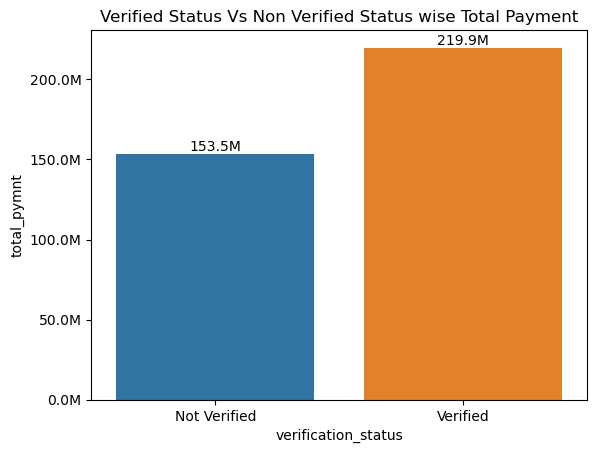

In [29]:
ax = df[df['verification_status'].isin(['Verified','Not Verified'])].groupby('verification_status')['total_pymnt'].sum().reset_index()

from matplotlib.ticker import FuncFormatter

def y_format(x,_):
    return f"{x/1000_000:.1f}M"

bx = sns.barplot(x = 'verification_status',y = 'total_pymnt', data = ax, )

bx.yaxis.set_major_formatter(FuncFormatter(y_format))

for i in bx.containers:
    bx.bar_label(i, fmt = lambda x: f"{x/1000_000:.1f}M")

plt.title("Verified Status Vs Non Verified Status wise Total Payment")
plt.show()

## Analysis of KPI-3:- 
**Verified Total payments are 220m which is 58.88% of total payments while non-verified total payments are 153.54m which is 42.12% of total payments** 


**Loans with verified payments have lower default rates and higher credit quality as compared to those with non-verified payments.**
**Non-verified payments may raise concerns about potential fraud or misrepresentation of income.**

# KPI-4: State wise and last_credit_pull_d wise loan status


In [30]:
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,year
0,54734,80364,25000,25000,19080,36 months,11.89,829.10,B,B4,...,RENT,85000.0,Verified,2009-01-08,Fully Paid,debt_consolidation,941xx,CA,19.48,2009
1,55742,114426,7000,7000,673,36 months,10.71,228.22,B,B5,...,RENT,65000.0,Not Verified,2008-01-05,Fully Paid,credit_card,112xx,NY,14.29,2008


In [31]:
data2.head(2)

,id,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,54734,0,Feb-94,0,NaN,NaN,10,0,28854,52.10%,...,21817.65,25000.0,4330.36,0.0,0.0,0.0,Oct-11,7392.08,NaN,Aug-12
1,55742,0,Oct-00,0,NaN,NaN,7,0,33623,76.70%,...,684.94,7000.0,1215.54,0.0,0.0,0.0,Jun-11,228.48,NaN,Aug-12


In [32]:
df['last_credit_pull_d'] = pd.to_datetime(data2['last_credit_pull_d'], format='%b-%y')

In [47]:
a1 = df['last_credit_pull_d'].dt.year
ax = df.groupby(['addr_state', a1])['loan_status'].value_counts().unstack().fillna(0)
ax.head(10)

loan_status                    Charged Off  Current  Fully Paid
addr_state last_credit_pull_d                                  
AK         2010.0                      0.0      0.0         1.0
           2011.0                      2.0      0.0         3.0
           2012.0                      4.0      0.0         9.0
           2013.0                      1.0      0.0         7.0
           2014.0                      2.0      0.0        15.0
           2015.0                      2.0      0.0         9.0
           2016.0                      4.0      2.0        19.0
AL         2009.0                      2.0      0.0         2.0
           2010.0                      2.0      0.0         7.0
           2011.0                      2.0      0.0        16.0

# KPI-5:- Home ownership Vs last payment date stats


In [34]:
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,year
0,54734,80364,25000,25000,19080,36 months,11.89,829.10,B,B4,...,RENT,85000.0,Verified,2009-01-08,Fully Paid,debt_consolidation,941xx,CA,19.48,2009
1,55742,114426,7000,7000,673,36 months,10.71,228.22,B,B5,...,RENT,65000.0,Not Verified,2008-01-05,Fully Paid,credit_card,112xx,NY,14.29,2008


In [35]:
data2.head(2)

,id,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,54734,0,Feb-94,0,NaN,NaN,10,0,28854,52.10%,...,21817.65,25000.0,4330.36,0.0,0.0,0.0,Oct-11,7392.08,NaN,Aug-12
1,55742,0,Oct-00,0,NaN,NaN,7,0,33623,76.70%,...,684.94,7000.0,1215.54,0.0,0.0,0.0,Jun-11,228.48,NaN,Aug-12


In [36]:
df['last_pymnt_d'] = df['last_pymnt_d'].str.strip

In [37]:
df['last_pymnt_d'] = pd.to_datetime(data2['last_pymnt_d'], format='%b-%y')

In [44]:
a1 = df['last_pymnt_d'].dt.year
ax = df.groupby(a1)['home_ownership'].value_counts().unstack().fillna(0)
ax

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
last_pymnt_d,,,,,
2008.0,56.0,0.0,0.0,11.0,70.0
2009.0,229.0,0.0,12.0,39.0,279.0
2010.0,706.0,2.0,16.0,185.0,939.0
2011.0,2131.0,1.0,34.0,422.0,2408.0
2012.0,3786.0,0.0,35.0,700.0,4383.0
2013.0,4254.0,0.0,0.0,703.0,4501.0
2014.0,4172.0,0.0,0.0,673.0,4424.0
2015.0,1207.0,0.0,1.0,160.0,1063.0
2016.0,1104.0,0.0,0.0,160.0,780.0


**1. This KPI involves analyzing the timing of last payments based on the borrower's home ownership status.**


**2. If we compare the 2008 homeownership-wise Count of the Last payment date to 2013 then we see that Mortgage and Rent loan type increases drastically.**


**3. Banks may use last payment date statistics to prioritize collections efforts. Loans with longer gaps since the last payment may require more proactive collections actions to mitigate potential losses.**
